In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
df=pd.read_csv('Advertising.csv')

In [12]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
24,25,62.3,12.6,18.3,9.7
187,188,191.1,28.7,18.2,17.3
182,183,56.2,5.7,29.7,8.7
174,175,222.4,3.4,13.1,11.5
70,71,199.1,30.6,38.7,18.3


In [16]:
df.shape

(200, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## EDA

In [23]:
# Rename Unnamed to Index
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

In [27]:
df.sample(5)

,Index,TV,Radio,Newspaper,Sales
139,140,184.9,43.9,1.7,20.7
75,76,16.9,43.7,89.4,8.7
80,81,76.4,26.7,22.3,11.8
147,148,243.2,49.0,44.3,25.4
135,136,48.3,47.0,8.5,11.6


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [47]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

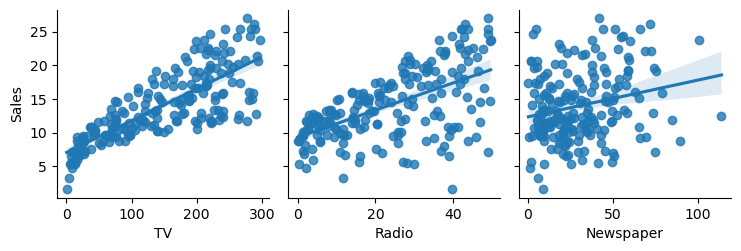

In [54]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='reg')

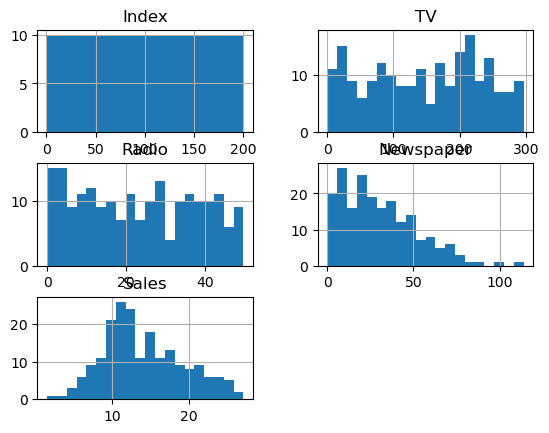

In [58]:
df.hist(bins=20)
plt.show()

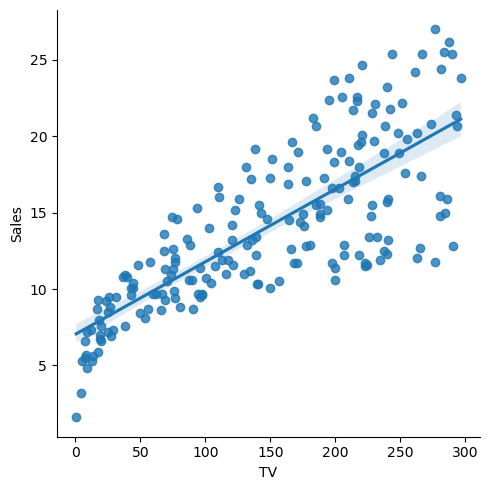

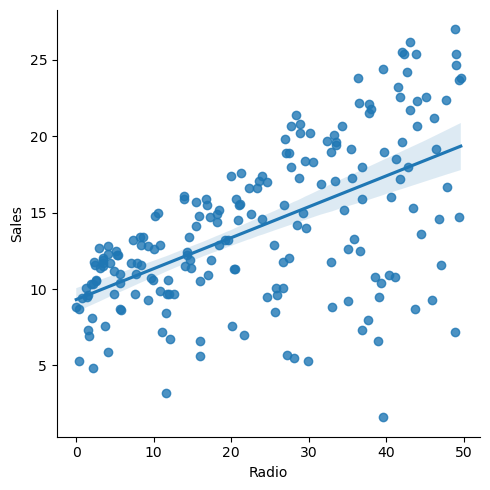

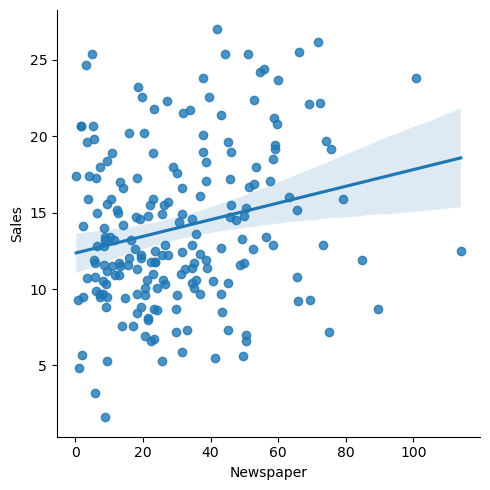

In [66]:
#linear regression plot
sns.lmplot(x='TV',y='Sales',data=df)
sns.lmplot(x='Radio',y='Sales',data=df)
sns.lmplot(x='Newspaper',y='Sales',data=df)

In [68]:
# correlation heatmap


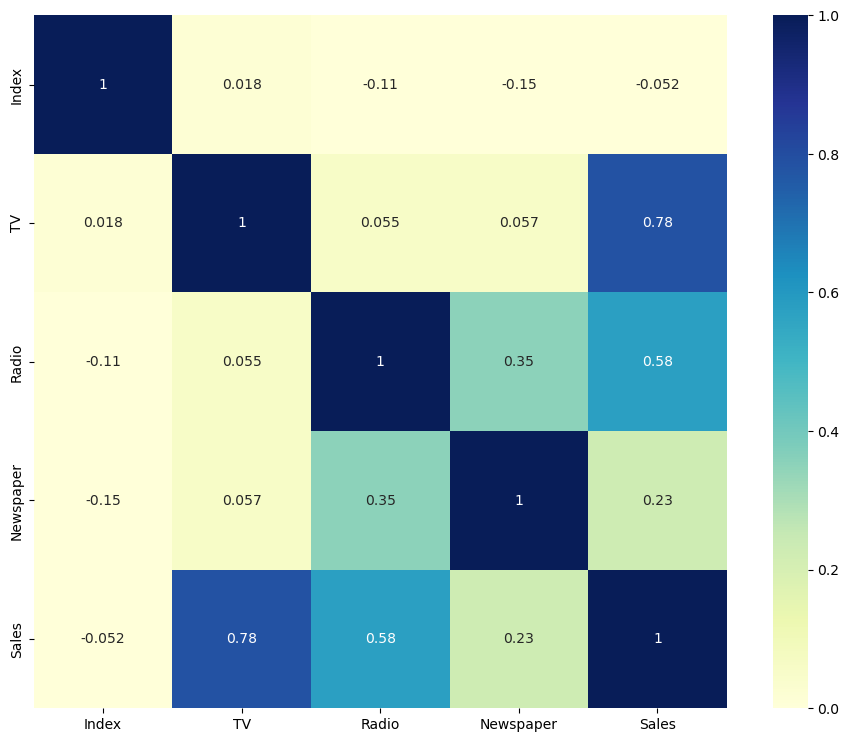

In [104]:
corrmat=df.corr()
f , ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap='YlGnBu',annot=True,  ax=ax)
plt.show()


In [112]:
df.drop(columns='Index',inplace=True)

KeyError: "['Index'] not found in axis"

In [114]:
df.sample(5)

,TV,Radio,Newspaper,Sales
142,220.5,33.2,37.9,20.1
172,19.6,20.1,17.0,7.6
73,129.4,5.7,31.3,11.0
0,230.1,37.8,69.2,22.1
46,89.7,9.9,35.7,10.6


In [158]:
X= df.drop('Sales',axis=1)
y= df[['Sales']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2 ,random_state=46) 

In [160]:
# Linear Regression Model
lin_model= sm.ols(formula="Sales ~ TV + Radio + Newspaper",data=df).fit()

In [162]:
# Print the coefficients of the linear model
print(lin_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [164]:
# Print the summary of the linear regression model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        20:14:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [173]:
# Evaluate the model
results=[]
names=[]

In [175]:
# Define a list of models to evaluate
models=[('LinearrReggersion',LinearRegression()),
        ('DecisionTree', DecisionTreeRegressor()),
        ('RandomForest', RandomForestRegressor())]

In [177]:
# Loop through each model, fit it to the data, and calculate the RMSE
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearrReggersion: 1.700510
DecisionTree: 1.574881
RandomForest: 0.689877


C:\Users\chala\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [179]:
# Example of making predictions on new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales for first input:", predicted_sales)


Predicted Sales for first input: 0    16.915917
dtype: float64


In [181]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales for second input:", predicted_sales)

Predicted Sales for second input: 0    15.877397
dtype: float64


In [183]:
import pickle
pickle.dump(lin_model, open('model.pkl', 'wb'))